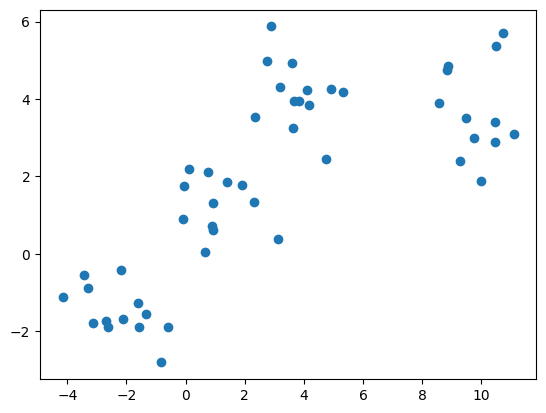

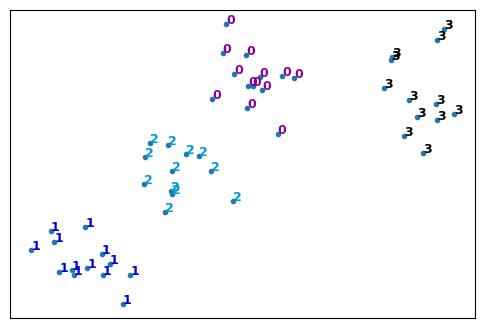

[[0.         0.36047161 0.46077956 ... 0.79050645 0.16313832 0.45020629]
 [0.36047161 0.         0.69741675 ... 0.43550361 0.28243924 0.78292089]
 [0.46077956 0.69741675 0.         ... 1.11134635 0.42297743 0.26671071]
 ...
 [0.79050645 0.43550361 1.11134635 ... 0.         0.7139052  1.21794753]
 [0.16313832 0.28243924 0.42297743 ... 0.7139052  0.         0.50601283]
 [0.45020629 0.78292089 0.26671071 ... 1.21794753 0.50601283 0.        ]]


<ipython-input-19-9a538a43e5ab>:38: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(distance_matrix, 'single')
<ipython-input-19-9a538a43e5ab>:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(distance_matrix, 'average')


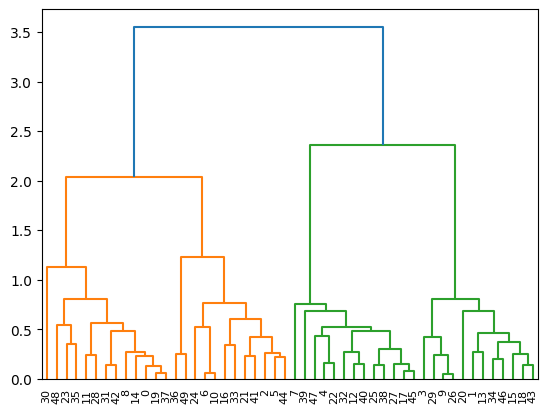

In [19]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs
#modul 5
#no 1
#single linkage dan average linkage
%matplotlib inline

data = pd.read_csv("/content/carss_clus.csv")
X1,y1 = make_blobs(n_samples=50, centers=[[4,4],[-2,-1], [1,1], [10,4]], cluster_std=0.9)
plt.scatter(X1[:,0], X1[:,1])
plt.show()

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')
agglom.fit(X1,y1)

plt.figure(figsize=(6,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)
for i in range(X1.shape[0]):
    plt.text(X1[i,0], X1[i,1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.scatter(X1[:,0], X1[:,1], marker='.')
plt.show()

distance_matrix = distance_matrix(X1,X1)
print(distance_matrix)
Z = hierarchy.linkage(distance_matrix, 'single')
Y = hierarchy.linkage(distance_matrix, 'average')
#dendro = hierarchy.dendrogram(Z)
dendro = hierarchy.dendrogram(Y)

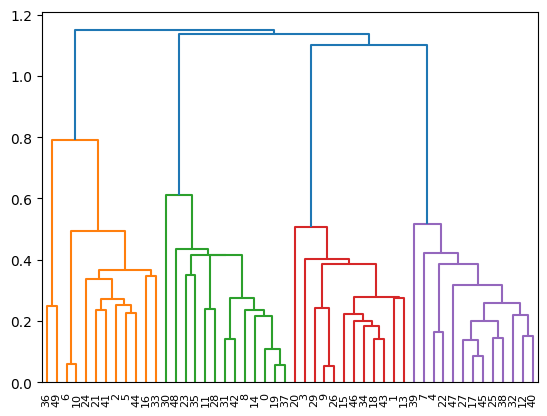

In [21]:
dendro = hierarchy.dendrogram(Z)

In [26]:
#no 2
#gunakan scipy dan scikit learn dengan single linkage dan average linkage

import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
feature_mtx, _ = make_blobs(n_samples=50, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

Z = hierarchy.linkage(distance_matrix, 'single')
Y = hierarchy.linkage(distance_matrix, 'average')
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
clusters = fcluster(Y, max_d, criterion='distance')
clusters


<ipython-input-26-f9012079e923>:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(distance_matrix, 'single')
<ipython-input-26-f9012079e923>:18: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(distance_matrix, 'average')


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

<ipython-input-28-c5e47037b4fa>:24: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = sch.linkage(D, method='single')
<ipython-input-28-c5e47037b4fa>:25: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_average = sch.linkage(D, method='average')


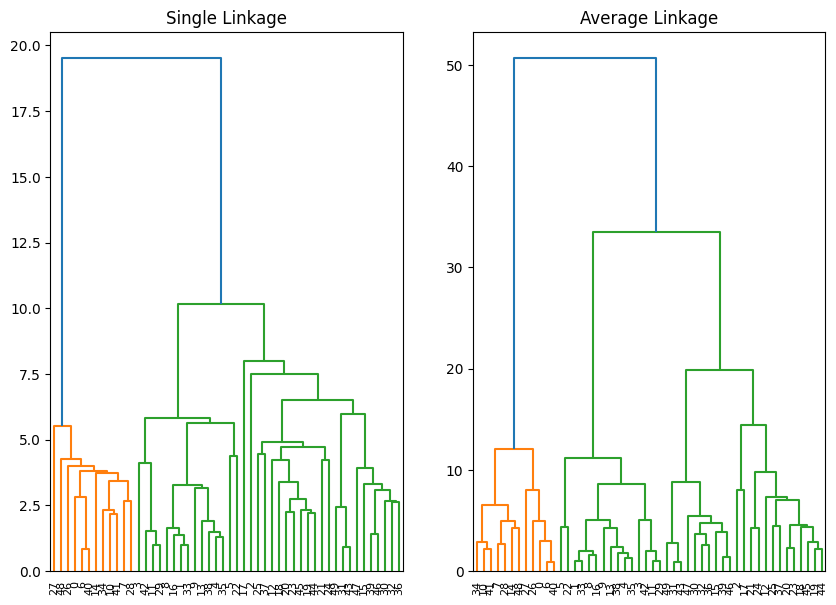

Clusters dari Single Linkage (scikit-learn): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Clusters dari Average Linkage (scikit-learn): [1 2 0 2 2 2 1 1 2 2 1 2 0 2 1 0 2 0 0 0 0 0 2 0 0 0 1 1 1 2 0 0 0 2 1 2 0
 0 2 0 1 1 2 0 0 0 0 0 1 0]


In [28]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import fcluster

feature_mtx, _ = make_blobs(n_samples=50, centers=[[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std=0.9)

# Menghitung ukuran data
leng = feature_mtx.shape[0]


D = np.zeros([leng, leng])


for i in range(leng):
    for j in range(leng):
        D[i, j] = euclidean(feature_mtx[i], feature_mtx[j])


Z_single = sch.linkage(D, method='single')
Z_average = sch.linkage(D, method='average')

max_d = 5
clusters_single = fcluster(Z_single, max_d, criterion='distance')
clusters_average = fcluster(Z_average, max_d, criterion='distance')


plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
sch.dendrogram(Z_single)
plt.title('Single Linkage')


plt.subplot(1, 2, 2)
sch.dendrogram(Z_average)
plt.title('Average Linkage')

plt.show()


agg_single = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=max_d)
agg_average = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=max_d)


agg_single_labels = agg_single.fit_predict(feature_mtx)
agg_average_labels = agg_average.fit_predict(feature_mtx)

print("Clusters dari Single Linkage (scikit-learn):", agg_single_labels)
print("Clusters dari Average Linkage (scikit-learn):", agg_average_labels)


<ipython-input-29-5580952b0c93>:37: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_single = sch.linkage(D, method='single')
<ipython-input-29-5580952b0c93>:38: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_average = sch.linkage(D, method='average')


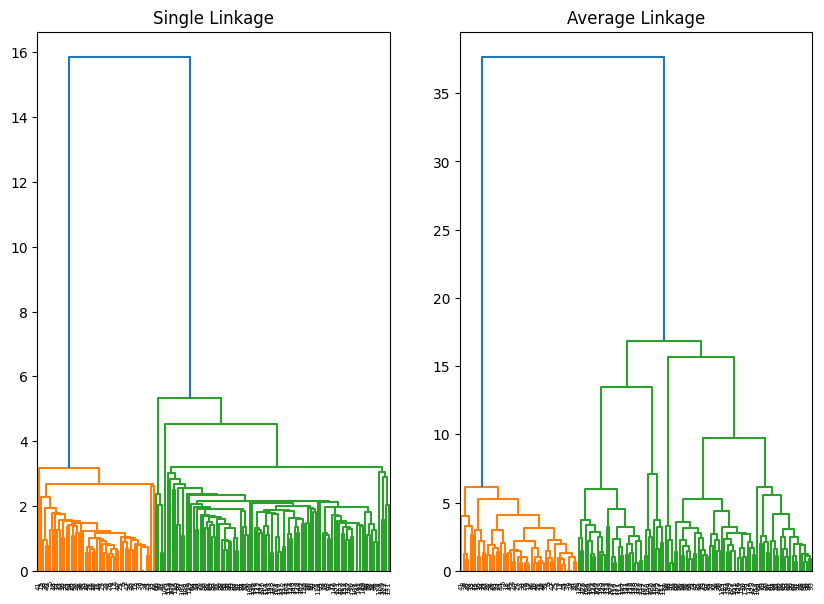

Clusters dari Single Linkage (scikit-learn): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Clusters dari Average Linkage (scikit-learn): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [29]:
#no 3

import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import fcluster
import urllib.request


url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]


data = pd.read_csv(url, header=None, names=column_names)


feature_mtx = data.iloc[:, :-1].values
target = data['species'].values


leng = feature_mtx.shape[0]


D = np.zeros([leng, leng])

for i in range(leng):
    for j in range(leng):
        D[i, j] = euclidean(feature_mtx[i], feature_mtx[j])


Z_single = sch.linkage(D, method='single')
Z_average = sch.linkage(D, method='average')


max_d = 5
clusters_single = fcluster(Z_single, max_d, criterion='distance')
clusters_average = fcluster(Z_average, max_d, criterion='distance')


plt.figure(figsize=(10, 7))
plt.subplot(1, 2, 1)
sch.dendrogram(Z_single)
plt.title('Single Linkage')


plt.subplot(1, 2, 2)
sch.dendrogram(Z_average)
plt.title('Average Linkage')

plt.show()


agg_single = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=max_d)
agg_average = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=max_d)


agg_single_labels = agg_single.fit_predict(feature_mtx)
agg_average_labels = agg_average.fit_predict(feature_mtx)

print("Clusters dari Single Linkage (scikit-learn):", agg_single_labels)
print("Clusters dari Average Linkage (scikit-learn):", agg_average_labels)
